<a href="https://colab.research.google.com/github/duonghiepit/loan-repayment-prediction/blob/main/loan_repayment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Repayment Prediction**

Mô tả ngắn về từng tính năng trong tập dữ liệu:

- credit_policy: 1 nếu khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của Lending-Club.com, và 0 là ngược lại.

- purpose: mục đích của khoản vay như: mở thẻ tín dụng, mua xe hơi, trang thiết bị gia đình…

- int_rate: lãi xuất của khoản vay.

- installment: số tiền trả góp hàng tháng mà người vay phải trả góp.

- log_annual_inc: nhật ký thu nhập hàng năm của người vay

- dti: hệ số nợ trên thu nhập (Debt to Income Ratio) là tỉ lệ phần trăm của tổng thu nhập hàng tháng để trả các khoản thanh toán nợ hàng tháng. Công thức: DTI= (Tổng các khoản thanh toán nợ hàng tháng)/(Tổng thu nhập hàng tháng)

- fico: điểm FICO là điểm tín dụng của người vay. Các tổ chức Tài Chính, Ngân Hàng dựa vào điểm FICO của người vay để đánh giá rủi ro tín dụng và xác định xem có nên cấp tín dụng hay không.? . 300 – 629: tệ . 630 – 689: khá . 690 – 719: tốt . 720 – 850: xuất sắc

- days_with_cr_line: Ngày được cấp hạn mức tín dụng của người vay.

- revol_bal: Tín dụng quay vòng là một kiểu hạn mức tín dụng mà khách hàng trả một khoản phí cam kết cho một tổ chức tài chính để vay tiền và sau đó được phép sử dụng tiền khi cần thiết. Ví dụ: phổ biến nhất về tín dụng quay vòng là hạn mức tín dụng cá nhân.

- revol_util: Tỉ lệ sử dụng nợ tín dụng là tỉ lệ phần trăm của tổng nợ tín dụng hiện có của người vay đang được sử dụng. Tỉ lệ sử dụng nợ tín dụng là một yếu tố được áp dụng bởi các cơ quan báo cáo tín dụng để tính điểm tín dụng của người vay.

- inq_last_6mths: Số lượng các câu hỏi của người vay đối với tổ chức Tài Chính trong 6 tháng qua.

- delinq_2yrs: Số lần người vay đã quá 30 ngày đến hạn thanh toán trong 2 năm qua.

- pub_rec: Thông tin về lịch sử tín dụng của bên vay (báo cáo tín dụng) mà bên cho vay có thể sử dụng hợp pháp, để bác bỏ yêu cầu vay hoặc đơn xin vay tín dụng. Bao gồm những việc như phá sản, thanh toán trễ hạn và các khoản vay đã xóa bỏ trước đây.

- not_fully_paid: thông tin cho biết khoản vay có được hoàn trả hay không (1: hoàn trả đầy đủ; 0: không hoàn trả đầy đủ)

- 0: Khoản vay chưa thanh toán đầy đủ

- 1: Khoản vay đã thanh toán đầy đủ

In [ ]:
!pip install xgboost
!pip install imbalanced-learn

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 1.Load Data

In [76]:
df_loan = pd.read_csv('/content/loan_data.csv')
df_loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


# 2.Thống kê

In [77]:
df_loan.count()

credit_policy        37066
purpose              37066
int_rate             37066
installment          37066
log_annual_inc       37066
dti                  36966
fico                 37066
days_with_cr_line    37066
revol_bal            37066
revol_util           37054
inq_last_6mths       37066
delinq_2yrs          37032
pub_rec              37066
not_fully_paid       37066
dtype: int64

In [78]:
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


## Drop NA, NULL

In [79]:
df_loan.dropna(inplace=True)

## Thống kê khoản vay
- 0: khoản vay được hoàn trả đầy đủ
- 1: khoản vay không được hoàn trả đầy đủ

1    26775
0    10145
Name: not_fully_paid, dtype: int64


<Axes: ylabel='not_fully_paid'>

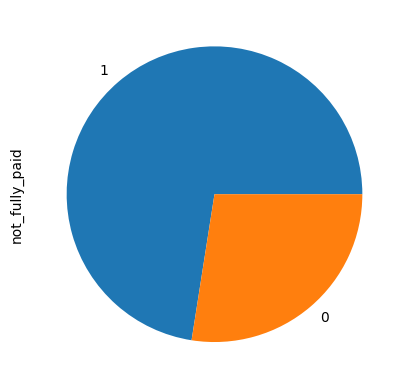

In [80]:
print(df_loan['not_fully_paid'].value_counts())
df_loan['not_fully_paid'].value_counts().plot(kind = 'pie')

# 3.Pre-processing data

In [81]:
df_loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [82]:
df_loan['purpose'].value_counts()

debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: purpose, dtype: int64

## Encoding

In [83]:
#one hot encoding:
#encode_purpose = pd.get_dummies(df_loan.purpose)

In [84]:
#df_loan['purpose'] = df_loan['purpose'].astype ('category').cat.codes
def encoding_purpose(x):
  if x=='debt_consolidation':
    return 1
  else: return 0
df_loan['purpose'] = df_loan['purpose'].apply(encoding_purpose)
df_loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,0,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,0,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,0,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [85]:
df_loan['purpose'].value_counts()

1    19516
0    17404
Name: purpose, dtype: int64

In [86]:
df_loan['credit_policy'].value_counts()

1    36920
Name: credit_policy, dtype: int64

1 100% => drop credit_policy column

In [87]:
df_loan.drop(columns=['credit_policy'], inplace=True)
df_loan.head()

,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,0,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,0,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,0,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


Text(0.5, 1.0, 'Correlation Heatmap')

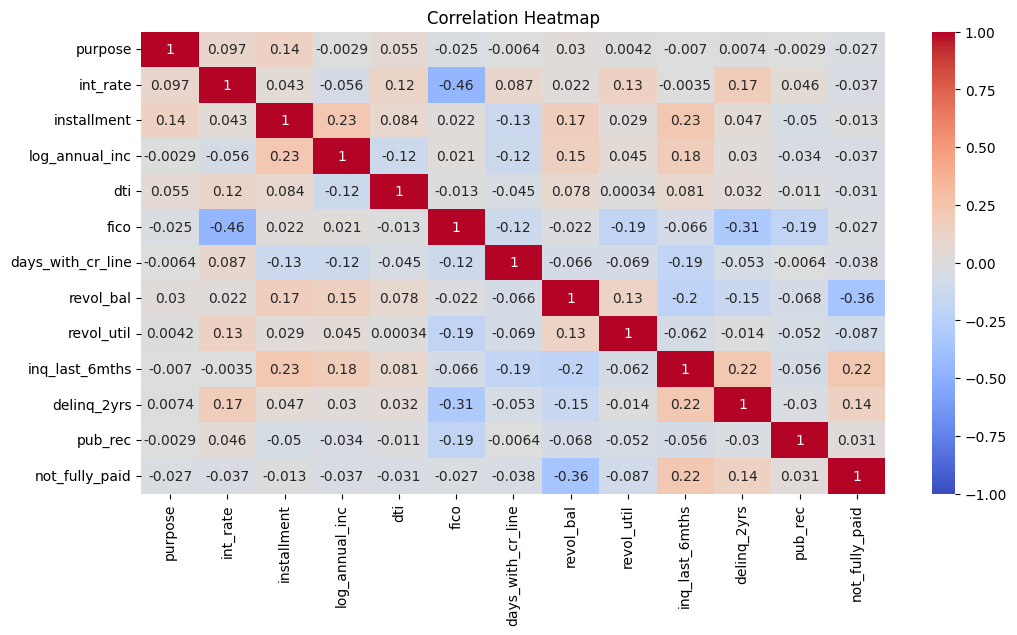

In [88]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_loan.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")

## Scale Data

In [137]:
input_fields = df_loan.drop(columns=['not_fully_paid']).columns.values
input_fields

array(['purpose', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec'], dtype=object)

In [138]:
X = df_loan[input_fields]
y = df_loan['not_fully_paid']

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[input_fields])
X[input_fields] = scaler.transform(X[input_fields])

<ipython-input-139-0a02cd706821>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[input_fields] = scaler.transform(X[input_fields])


## Split train, test data

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [141]:
X_train.head()

,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
24635,1.0,0.729412,0.505840,0.013441,0.017107,0.053763,0.697771,0.000000,0.086957,0.018102,0.051333,0.2
22808,0.0,0.266667,0.386884,0.009247,0.003403,0.403226,0.705218,0.000002,0.000000,0.017255,0.043933,0.0
16378,1.0,0.400000,0.236607,0.004839,0.017828,0.080645,0.848958,0.000000,0.000000,0.012404,0.046133,0.0
25975,0.0,0.266667,0.144526,0.005376,0.016697,0.188172,0.832603,0.000006,0.000000,0.014905,0.028933,0.0
16426,0.0,0.086275,0.246575,0.017742,0.004795,0.456989,0.813376,0.000000,0.000000,0.005965,0.011467,0.2


# 4.Train model

## 4.1. Logistic Regression, Upsampling bằng SMOTE

In [142]:
y_train.value_counts()

1    21484
0     8052
Name: not_fully_paid, dtype: int64

In [143]:
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [144]:
y_train_resample.value_counts()

1    21484
0    21484
Name: not_fully_paid, dtype: int64

In [145]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [146]:
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2093
           1       0.87      0.88      0.88      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384



In [148]:
print(ConfusionMatrixDisplay(model_log))

### Grid search tìm tham số tối ưu

In [154]:
from sklearn.model_selection import GridSearchCV

params_grid_logistic = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1', 'l2']}

grid_logistic = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), params_grid_logistic, cv=10)
grid_logistic.fit(X_train_resample, y_train_resample)

print('tuned hyperparameters: (best parameters)', grid_logistic.best_params_)
print(grid_logistic.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

tuned hyperparameters: (best parameters) {'C': 1000, 'penalty': 'l2'}
0.7922642588978757


## 4.2. Không Upsampling và dùng XGBoost

In [156]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=200)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      2093
           1       0.87      0.91      0.89      5291

    accuracy                           0.84      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.84      0.83      7384



0.77964


<ipython-input-158-0032ea0593ef>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


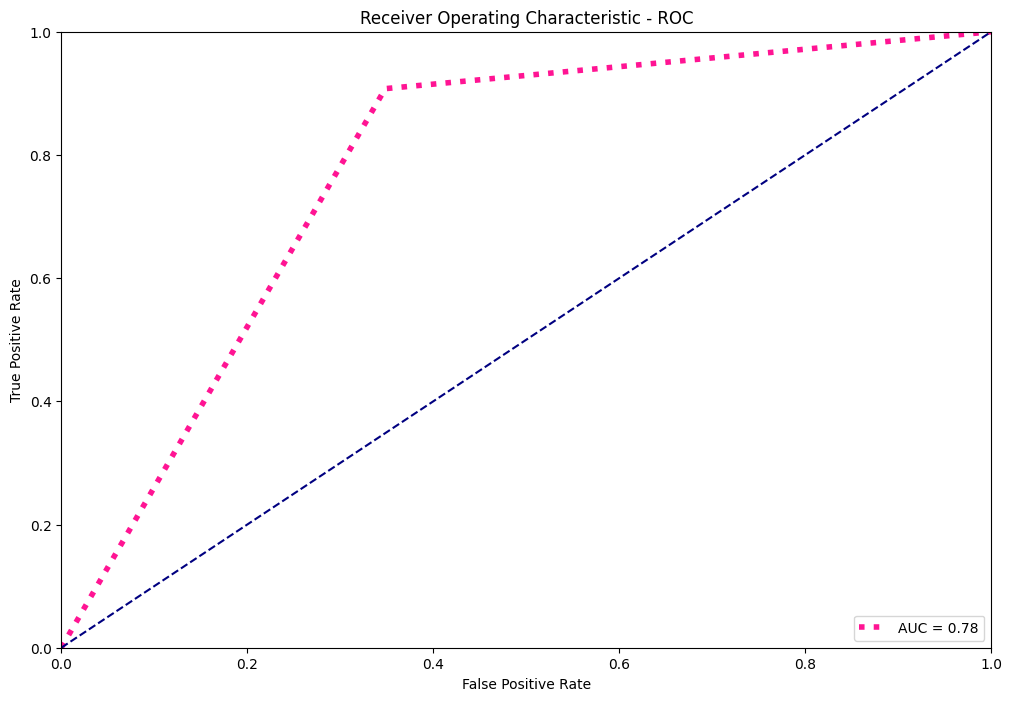

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
#Grid search XGBoost
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [161]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=160, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)